# mecab colab에 설치

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
#! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
#ls
#cd /content/Mecab-ko-for-Google-Colab
#! bash install_mecab-ko_on_colab190912.sh

# imports

In [ ]:
import konlpy
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 뉴스기사 불러오기

In [ ]:
news = pd.read_excel('/content/article.xlsx', header=1, usecols=['date','title','content','url'])

In [ ]:
news[:2]

,date,title,content,url
0,2021.04.14 16:49,"삼성, 車반도체 생산 가능성은…""수익성·기존 고객사 문제로 어려워""","인텔, 美반도체 회의 직후 ""車반도체 생산""MCU 생산 전망…""삼성, 뛰어들기 어려...",https://finance.naver.com/item/news_read.nhn?a...
1,2021.04.14 10:58,"[뉴스+]LCD 수익성 악화에 커지는 OLED 시장…삼성, LGD와 손...","LCD 패널 가격 급등에 제조업체 수익성 악화LG전자, QNED 출시 숨고르며 OL...",https://finance.naver.com/item/news_read.nhn?a...


In [ ]:
tag_classes = ['NNP', 'NNG', 'VV+EC', 'XSV+EP', 'SL']   # 추출할 품사 종류
stopwords = ['삼성전자', '삼성', '인텔', '데일리', '기자'] # 불용어 처리
X_test = []
for main in news['content']:    # 표에서 메인 기사 개수만큼 반복
    temp=[]                     # 임시저장할 배열
    for word in mecab.pos(main):        # 기사에서 (단어, 품사) 형태의 word 뽑아내서 하나씩 사용
        if word[1] in tag_classes:      # word[1]=>품사 가 추출할 품사종류에 들어 있으면
            if word[0] not in stopwords:    # 불용어에 들어있지 않으면
                temp.append(word[0])           # temp배열에 단어=> word[0] 추가
    X_test.append(temp)         # test 셋 배열에 저장

In [ ]:
print(X_test[0])

['美', '반도체', '회의', '직후', '車', '반도체', '생산', 'MCU', '생산', '전망', '뛰어들기', '수익', '제조', '인증', '상당', '시간', '소요', '라인', '전환', '기존', '고객', '사', '공급', '문제', '발생', '신중섭', '조', '바이든', '미국', '대통령', '주재', '백악관', '반도체', '회의', '직후', '컴퓨터', '중앙', '처리', '장치', 'CPU', '제조', '차량', '반도체', '생산', '완성', '차', '업계', '공급', '부족', '해소', '업계', '일각', '차량', '반도체', '생산', '관측', '단기간', '마이크', '컨트롤', '유닛', 'MCU', '차량', '반도체', '생산', '현실', '전망', '지배', '미국', '텍사스', '오스틴', '주', '파운드리', '공장', '사진', '따라', '車', '반도체', '생산', '업계', '팻', '겔', '싱어', '최고', '경영자', 'CEO', '현지', '시간', '백악관', '반도체', '공급', '망', '회의', '이후', '로이터', '통신', '인터뷰', '앞', '실제', '반도체', '생산', '목표', '아래', '차량', '반도체', '설계', '업체', '협의', '진행', '미국', '대표', '종합', '반도체', '기업', 'IDM', '개인', '컴퓨터', 'PC', '탑재', 'CPU', '서버', '반도체', '제조', '팹', '리스', '반도체', '설계', '기업', '주문', '반도체', '제조', '파운드리', '위탁', '생산', '사업', '최근', '복귀', '선언', '본격', '시행', '최소', '수년', '시간', '전망', '이번', '결정', '일부', '생산', '라인', '차량', '반도체', '일시', '전환', '글로벌', '공', '급난', '의미', '풀이', '생산', '반도체', '차량', '반도체', '

# tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
print(tokenizer.word_index)

{'반도체': 1, '했': 2, 'tv': 3, '분기': 4, '시': 5, '주가': 6, '생산': 7, '곳': 8, 'lg': 9, 'oled': 10, '외국인': 11, '가격': 12, '올해': 13, '지급': 14, '전망': 15, 'lcd': 16, '배당금': 17, '상승': 18, '미국': 19, '시장': 20, '투자': 21, '말': 22, '실적': 23, '공급': 24, '패널': 25, '영업': 26, '업계': 27, '디스플레이': 28, '이익': 29, '차량': 30, '공장': 31, '예상': 32, '증가': 33, '이번': 34, '정수기': 35, '전자': 36, '경제': 37, '오스틴': 38, '이후': 39, '종합': 40, '정보': 41, '매수': 42, '투자자': 43, '기능': 44, '가전': 45, '영향': 46, 'edaily': 47, 'co': 48, 'kr': 49, '미디어': 50, '무단': 51, '전재': 52, '배포': 53, '금지': 54, '가능': 55, '포함': 56, '전략': 57, '배당': 58, '비스': 59, '회의': 60, 'mcu': 61, '라인': 62, '규모': 63, '주식': 64, '자산': 65, '포크': 66, '전환': 67, '문제': 68, '파운드리': 69, '업체': 70, '기업': 71, '공': 72, '시스템': 73, '계약': 74, 'led': 75, '분석': 76, '참석': 77, '모듈': 78, '필터': 79, '수익': 80, '제조': 81, '시간': 82, '바이든': 83, '글로벌': 84, '제품': 85, '국내': 86, '기록': 87, '총': 88, '순위': 89, '부문': 90, '정수': 91, '기존': 92, '조': 93, '대통령': 94, '최근': 95, '수준': 96, '기관': 97, '해당': 98, '중단': 99, 

In [ ]:
# 빈도수 낮은 단어 제거
threshold = 3   # 희귀단어라고 부를 등장횟수 기준
words_cnt = len(tokenizer.word_index)   # 총 단어 개수
rare_cnt = 0        # 희귀단어 개수
words_freq = 0      # 모든 단어 등장 횟수의 합
rare_freq = 0       # 희귀단어들의 등장 횟수의 합

for key, value in tokenizer.word_counts.items():  # items = (단어, 단어등장횟수) 형태
    words_freq = words_freq + value
    if value < threshold:   # 등장 횟수가 기준보다 낮으면 
        rare_cnt += 1       # 희귀 단어 개수 +1
        rare_freq = rare_freq + value   # 희귀 단어 등장 횟수 += 기준보다 낮은 단어 등장 횟수
print("전체단어수", words_cnt)
print(f"빈도수 {threshold-1} 이하인 단어수:", rare_cnt)
print("희귀 단어 비율:", rare_cnt / words_cnt )
print("희귀 단어 등장 빈도 비율:", rare_freq / words_freq)

전체단어수 1008
빈도수 2 이하인 단어수: 695
희귀 단어 비율: 0.689484126984127
희귀 단어 등장 빈도 비율: 0.2711397058823529


In [ ]:
tokenizer.word_counts.items()

odict_items([('美', 3), ('반도체', 70), ('회의', 10), ('직후', 3), ('車', 2), ('생산', 29), ('mcu', 10), ('전망', 23), ('뛰어들기', 1), ('수익', 8), ('제조', 8), ('인증', 6), ('상당', 4), ('시간', 8), ('소요', 1), ('라인', 10), ('전환', 9), ('기존', 7), ('고객', 5), ('사', 6), ('공급', 19), ('문제', 9), ('발생', 3), ('신중섭', 4), ('조', 7), ('바이든', 8), ('미국', 21), ('대통령', 7), ('주재', 2), ('백악관', 6), ('컴퓨터', 2), ('중앙', 1), ('처리', 1), ('장치', 2), ('cpu', 2), ('차량', 16), ('완성', 1), ('차', 2), ('업계', 17), ('부족', 5), ('해소', 2), ('일각', 3), ('관측', 3), ('단기간', 1), ('마이크', 3), ('컨트롤', 1), ('유닛', 1), ('현실', 2), ('지배', 4), ('텍사스', 4), ('오스틴', 12), ('주', 3), ('파운드리', 9), ('공장', 16), ('사진', 4), ('따라', 3), ('팻', 1), ('겔', 1), ('싱어', 1), ('최고', 2), ('경영자', 2), ('ceo', 3), ('현지', 3), ('망', 6), ('이후', 12), ('로이터', 1), ('통신', 1), ('인터뷰', 1), ('앞', 1), ('실제', 2), ('목표', 2), ('아래', 2), ('설계', 3), ('업체', 9), ('협의', 2), ('진행', 3), ('대표', 5), ('종합', 12), ('기업', 9), ('idm', 1), ('개인', 4), ('pc', 1), ('탑재', 2), ('서버', 1), ('팹', 1), ('리스', 1), ('주문', 1), ('위탁'

In [ ]:
vocab_size = words_cnt - rare_cnt + 2
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_test)
X_test = tokenizer.texts_to_sequences(X_test)

odict_items([('美', 3), ('반도체', 70), ('회의', 10), ('직후', 3), ('車', 2), ('생산', 29), ('mcu', 10), ('전망', 23), ('뛰어들기', 1), ('수익', 8), ('제조', 8), ('인증', 6), ('상당', 4), ('시간', 8), ('소요', 1), ('라인', 10), ('전환', 9), ('기존', 7), ('고객', 5), ('사', 6), ('공급', 19), ('문제', 9), ('발생', 3), ('신중섭', 4), ('조', 7), ('바이든', 8), ('미국', 21), ('대통령', 7), ('주재', 2), ('백악관', 6), ('컴퓨터', 2), ('중앙', 1), ('처리', 1), ('장치', 2), ('cpu', 2), ('차량', 16), ('완성', 1), ('차', 2), ('업계', 17), ('부족', 5), ('해소', 2), ('일각', 3), ('관측', 3), ('단기간', 1), ('마이크', 3), ('컨트롤', 1), ('유닛', 1), ('현실', 2), ('지배', 4), ('텍사스', 4), ('오스틴', 12), ('주', 3), ('파운드리', 9), ('공장', 16), ('사진', 4), ('따라', 3), ('팻', 1), ('겔', 1), ('싱어', 1), ('최고', 2), ('경영자', 2), ('ceo', 3), ('현지', 3), ('망', 6), ('이후', 12), ('로이터', 1), ('통신', 1), ('인터뷰', 1), ('앞', 1), ('실제', 2), ('목표', 2), ('아래', 2), ('설계', 3), ('업체', 9), ('협의', 2), ('진행', 3), ('대표', 5), ('종합', 12), ('기업', 9), ('idm', 1), ('개인', 4), ('pc', 1), ('탑재', 2), ('서버', 1), ('팹', 1), ('리스', 1), ('주문', 1), ('위탁'

In [ ]:
X_test[0]

In [ ]:
for index, (word, count) in enumerate(tokenizer.word_counts.items()):
    print(index, word, count)

0 美 3
1 반도체 70
2 회의 10
3 직후 3
4 車 2
5 생산 29
6 mcu 10
7 전망 23
8 뛰어들기 1
9 수익 8
10 제조 8
11 인증 6
12 상당 4
13 시간 8
14 소요 1
15 라인 10
16 전환 9
17 기존 7
18 고객 5
19 사 6
20 공급 19
21 문제 9
22 발생 3
23 신중섭 4
24 조 7
25 바이든 8
26 미국 21
27 대통령 7
28 주재 2
29 백악관 6
30 컴퓨터 2
31 중앙 1
32 처리 1
33 장치 2
34 cpu 2
35 차량 16
36 완성 1
37 차 2
38 업계 17
39 부족 5
40 해소 2
41 일각 3
42 관측 3
43 단기간 1
44 마이크 3
45 컨트롤 1
46 유닛 1
47 현실 2
48 지배 4
49 텍사스 4
50 오스틴 12
51 주 3
52 파운드리 9
53 공장 16
54 사진 4
55 따라 3
56 팻 1
57 겔 1
58 싱어 1
59 최고 2
60 경영자 2
61 ceo 3
62 현지 3
63 망 6
64 이후 12
65 로이터 1
66 통신 1
67 인터뷰 1
68 앞 1
69 실제 2
70 목표 2
71 아래 2
72 설계 3
73 업체 9
74 협의 2
75 진행 3
76 대표 5
77 종합 12
78 기업 9
79 idm 1
80 개인 4
81 pc 1
82 탑재 2
83 서버 1
84 팹 1
85 리스 1
86 주문 1
87 위탁 2
88 사업 4
89 최근 7
90 복귀 1
91 선언 1
92 본격 1
93 시행 1
94 최소 4
95 수년 1
96 이번 15
97 결정 6
98 일부 4
99 일시 2
100 글로벌 8
101 공 9
102 급난 6
103 의미 3
104 풀이 1
105 핵심 2
106 집적회로 1
107 ic 1
108 내부 3
109 연산 1
110 프로세서 2
111 메모리 6
112 내장 1
113 전장 1
114 시스템 9
115 제어 1
116 nxp 2
117 르네 1
118 사스 1
119 인 

In [ ]:
# 빈도수 낮은 단어들을 제거하고 빈칸이 된 데이터 제거
drop_test = [index for index, (word, count) in enumerate(tokenizer.word_counts.items()) if count < 3]
print(len(drop_test))
X_test = np.delete(X_test, drop_test, axis=1)
# y_test = np.delete(y_test, drop_test, axis=0)

695


IndexError: ignored

In [ ]:
X_test

array([list([42, 227, 3, 66, 228, 1, 3, 10, 67, 10, 18, 27, 1, 86, 87, 118, 175, 88, 1, 68, 73, 98, 141, 119, 28, 74, 229, 7, 176, 43, 99, 89, 22, 100, 1, 120, 3, 66, 228, 1, 1, 1, 1, 1, 87, 42, 34, 3, 10, 1, 1, 31, 28, 142, 1, 31, 230, 2, 34, 3, 10, 231, 2, 42, 1, 232, 1, 1, 67, 34, 3, 10, 1, 18, 177, 22, 178, 44, 233, 27, 75, 35, 179, 2, 42, 234, 27, 1, 3, 10, 31, 1, 1, 1, 42, 1, 1, 235, 236, 88, 120, 3, 28, 121, 66, 45, 1, 1, 1, 1, 1, 3, 10, 1, 1, 34, 3, 237, 76, 1, 238, 22, 143, 46, 3, 77, 1, 42, 180, 1, 1, 1, 1, 1, 3, 87, 1, 1, 3, 237, 77, 1, 3, 87, 75, 1, 10, 181, 101, 1, 1, 1, 1, 182, 1, 88, 18, 38, 122, 183, 10, 68, 34, 3, 1, 73, 90, 78, 123, 239, 1, 42, 10, 3, 34, 3, 78, 123, 1, 67, 67, 1, 1, 240, 1, 1, 124, 1, 3, 34, 1, 79, 1, 1, 1, 1, 1, 1, 34, 3, 77, 67, 175, 1, 1, 10, 67, 1, 10, 125, 241, 1, 230, 42, 122, 2, 34, 3, 87, 242, 231, 3, 78, 123, 1, 1, 120, 75, 42, 27, 1, 2, 183, 34, 3, 10, 102, 67, 184, 2, 10, 18, 177, 74, 1, 34, 3, 69, 41, 1, 3, 1, 51, 47, 1, 1, 1, 243, 1, 243

In [ ]:
# 패딩
# 최대 길이, 평균 길이
max(len(l) for l in X_test),sum(len(l) for l in X_test)/len(X_test)

(593, 311.3636363636364)

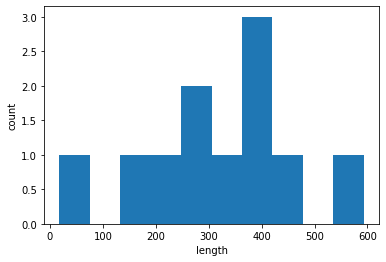

In [ ]:
plt.hist([len(s) for s in X_test])
plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [ ]:
#감성사전에 추가 ########################################################################################################

In [ ]:
mecab.pos('폴더블폰을 쓰는 지미카터주니어')

[('폴', 'NNG'),
 ('더블', 'NNG'),
 ('폰', 'NNG'),
 ('을', 'JKO'),
 ('쓰', 'VV'),
 ('는', 'ETM'),
 ('지미카터', 'NNP'),
 ('주니어', 'NNP')]

In [ ]:
# site
# https://somjang.tistory.com/entry/Google-Colab%EC%97%90%EC%84%9C-mecab-ko-dic-%EC%82%AC%EC%9A%A9%EC%9E%90-%EC%82%AC%EC%A0%84-%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0?category=348828

In [ ]:
# mecab 사용자 사전 폴더로 작업경로 변경
import os
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
# nnp.csv 는 명사, person.csv 는 인명, place.csv 는 등록되지 않은 장소에 대한 이름을 등록하는 파일

In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
  file_data = f.readlines()

In [ ]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n', '구글,,,,NNP,*,T,구글,*,*,*,*,*\n']

In [ ]:
# 먼저 대우와 구글 두개의 단어는 새로 등록하고자 하는 단어 그자체이고
# NNP는 해당 단어의 형태소 종류,
# 그 다음 나오는 F와 T는 마지막 글자에 받침이 있는지 없는지 ( 종성여부 ) 를 나타내는 것으로
# 대우에서 마지막 단어인 우에 받침이 없으니 False의 F
# 구글에서 마지막 단어인 글에 받침이 있으니 True 의 T 

In [ ]:
!pip install jamo

In [ ]:
# 종성판단하는 함수 -> 마지막단어의 받침침
from jamo import h2j, j2hcj

In [ ]:
def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text)
    last_word = sample_text_list[-1] 
    last_word_jamo_list = list(j2hcj(h2j(last_word))) 
    last_jamo = last_word_jamo_list[-1] 
    
    jongsung_TF = "T" 
    
    # 모음으로 끝난다 = 받침이 없다 = F
    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F"
    return jongsung_TF

In [ ]:
# 파일열기
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
    file_data = f.readlines()

# 단어사전에 추가할 단어
word_list = ["폴더블폰", '지미카터주니어']

# 단어사전 포맷에 맞춰서 읽어온 사전 file_data 배열에 추가로 저장
for word in word_list:
    jongsung_TF = get_jongsung_TF(word)
    line = f'{word},,,0,NNP,*,{jongsung_TF},{word},*,*,*,*,*\n'
    file_data.append(line)

In [ ]:
# 파일 쓰기
with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f:
  for line in file_data:
    f.write(line)

In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
    file_data = f.readlines()
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '폴더블폰,,,0,NNP,*,T,폴더블폰,*,*,*,*,*\n',
 '지미카터주니어,,,0,NNP,*,F,지미카터주니어,*,*,*,*,*\n']

In [ ]:
!bash ./tools/add-userdic.sh

In [ ]:
!make install

make[1]: Entering directory '/tmp/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/tmp/mecab-ko-dic-2.1.1-20180720'


In [ ]:
mecab.tagger.parse('폴더블폰')

'폴\tNNG,*,T,폴,*,*,*,*\n더블\tNNG,*,T,더블,*,*,*,*\n폰\tNNG,*,T,폰,*,*,*,*\nEOS\n'

In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f:
    file_data = f.readlines()

In [ ]:
file_data

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '폴더블폰,,,0,NNP,*,T,폴더블폰,*,*,*,*,*\n',
 '지미카터주니어,,,0,NNP,*,F,지미카터주니어,*,*,*,*,*\n']